In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("Drugs A B C X Y/drug200.csv")

In [5]:
# Cek ada kolom kosong atau tidak
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## EDA

<Axes: xlabel='Drug', ylabel='Age'>

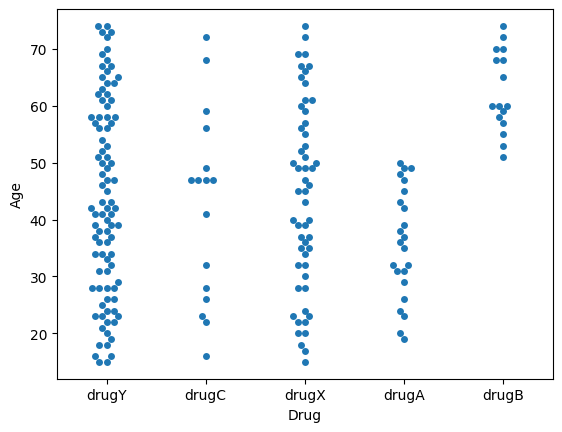

In [9]:
sns.swarmplot(x="Drug", y="Age", data=df)

In [11]:
print("Drug A usage age ends at", df["Age"][df["Drug"] == "drugA"].max(), "years old")
print("Drug B usage age starts at", df["Age"][df["Drug"] == "drugB"].min(), "years old")

Drug A usage age ends at 50 years old
Drug B usage age starts at 51 years old


In [13]:
gender_drug = df.groupby(["Sex","Drug"]).size().reset_index(name = "Count")

gender_drug

,Sex,Drug,Count
0,F,drugA,9
1,F,drugB,6
2,F,drugC,7
3,F,drugX,27
4,F,drugY,47
5,M,drugA,14
6,M,drugB,10
7,M,drugC,9
8,M,drugX,27
9,M,drugY,44


<Axes: xlabel='Drug', ylabel='Count'>

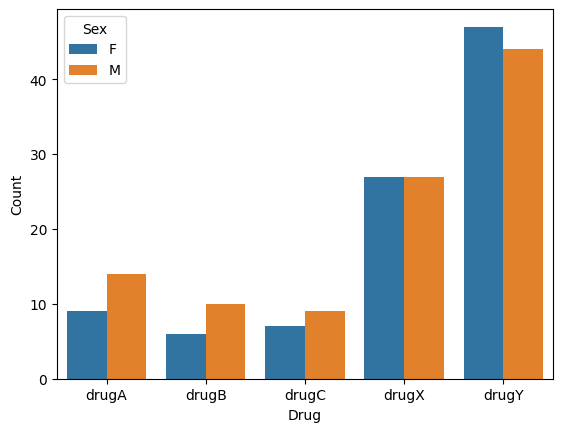

In [14]:
sns.barplot(x="Drug", y="Count", hue="Sex", data=gender_drug)

In [16]:
bp_drug = df.groupby(["BP","Drug"]).size().reset_index(name = "Count")

bp_drug

,BP,Drug,Count
0,HIGH,drugA,23
1,HIGH,drugB,16
2,HIGH,drugY,38
3,LOW,drugC,16
4,LOW,drugX,18
5,LOW,drugY,30
6,NORMAL,drugX,36
7,NORMAL,drugY,23


<Axes: xlabel='Drug', ylabel='Count'>

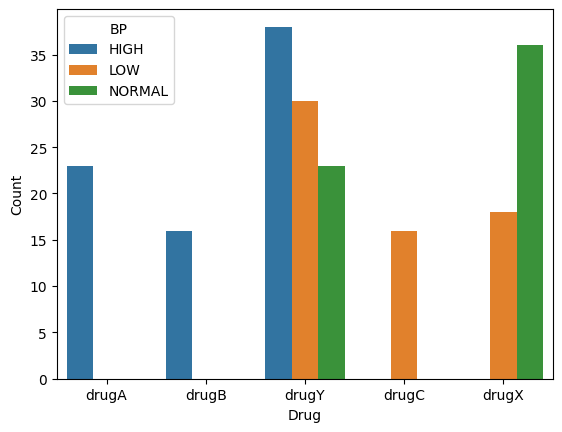

In [17]:
sns.barplot(x="Drug", y="Count", hue="BP", data=bp_drug)

In [19]:
chol_drug = df.groupby(["Cholesterol","Drug"]).size().reset_index(name = "Count")
chol_drug

,Cholesterol,Drug,Count
0,HIGH,drugA,12
1,HIGH,drugB,8
2,HIGH,drugC,16
3,HIGH,drugX,20
4,HIGH,drugY,47
5,NORMAL,drugA,11
6,NORMAL,drugB,8
7,NORMAL,drugX,34
8,NORMAL,drugY,44


<Axes: xlabel='Drug', ylabel='Count'>

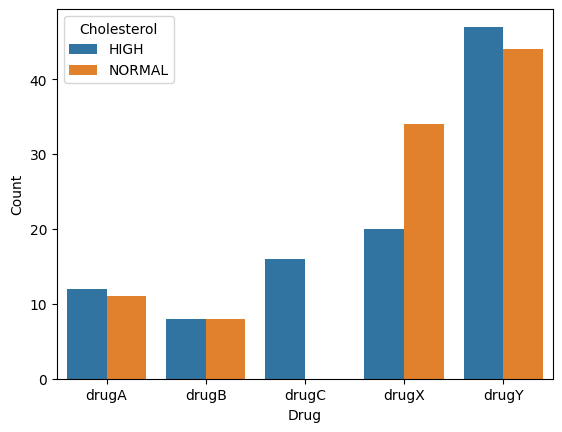

In [20]:
sns.barplot(x="Drug", y="Count", hue="Cholesterol", data=chol_drug)

<Axes: xlabel='Drug', ylabel='Na_to_K'>

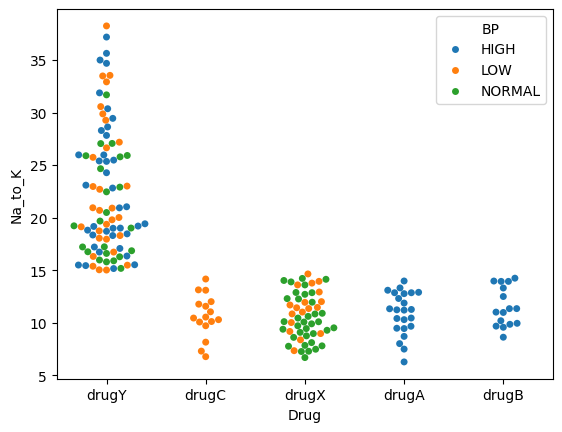

In [22]:
sns.swarmplot(x="Drug", y="Na_to_K", data=df, hue="BP")

<Axes: xlabel='Drug', ylabel='Na_to_K'>

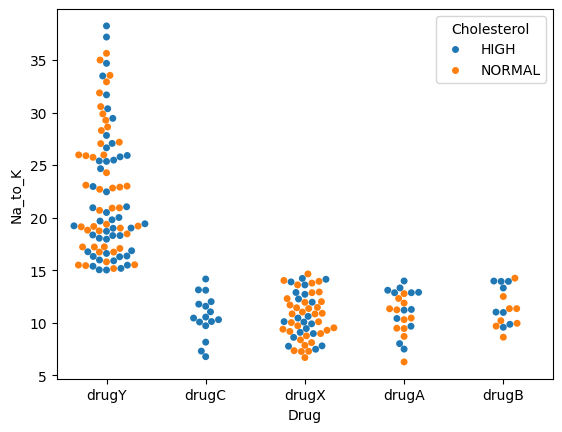

In [24]:
sns.swarmplot(x="Drug", y="Na_to_K", data=df, hue="Cholesterol")

In [25]:
X = df.drop(["Drug"], axis=1)
Y = df["Drug"]

In [28]:
le = LabelEncoder()

for col in X.columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
        X[col] = le.fit_transform(X[col])

In [29]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [32]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
lg = LogisticRegression(max_iter=5000)
lg.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

In [36]:
lg_prediction = lg.predict(X_train)
lg_acc = accuracy_score(Y_train, lg_prediction)
print(str(round(lg_acc * 10000) / 100) + "% Accuracy")

95.62% Accuracy


In [44]:
y_pred = lg.predict(X_test)
lg_acc_test = accuracy_score(Y_test, y_pred)
print(str(round(lg_acc_test * 10000) / 100) + "% Accuracy")

82.5% Accuracy


In [45]:
# Menampilkan laporan klasifikasi
report = classification_report(Y_test, y_pred)
print("Laporan Klasifikasi:\n", report)

Laporan Klasifikasi:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      0.75      0.86         4
       drugC       1.00      0.75      0.86         4
       drugX       1.00      0.69      0.81        16
       drugY       0.63      1.00      0.77        12

    accuracy                           0.82        40
   macro avg       0.93      0.84      0.86        40
weighted avg       0.89      0.82      0.83        40



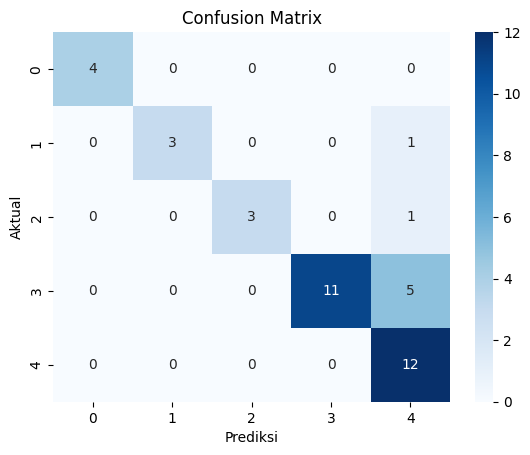

In [46]:
# Menampilkan confusion matrix dalam bentuk heatmap
confusion = confusion_matrix(Y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()